<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER4%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 분류(classification)의 개요**

앙상블을 주로 다루는 챕터입니다. 앙상블은 정형 데이터의 예측 분석 영역에서 매우 좋은 예측 성능을 발휘합니다. 대부분 동일한 알고리즘을 결합하며, 기본 알고리즘으로 사용하는 것은 결정 트리입니다.

# **2. 결정 트리**

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듭니다. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측합니다. 쉽게 예측할 수 있는 조건을 찾아서 분류하는 것이 가장 효율적이기 때문입니다.

이러한 정보 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 **정보 이득(Information Gain)**과 지니계수입니다.

정보 이득은 **엔트로피(주어진 데이터 집합의 혼잡도)**를 기반으로 합니다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다. 

지니 계수는 경제학에서 불평등 지수를 나타내는 데 쓰이는 지수입니다. 머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석하고, 지니 계수가 낮은 속성을 기준으로 분할합니다. 다시 말하면, 데이터 세트를 분할하는 데 가장 좋은 조건은 정보 이득이 높거나 지니 계수가 낮은 조건입니다. `DecisionTreeClassifier` 클래스는 기본적으로 지니 계수를 이용하여 데이터를 분할합니다. 

## **2.1. 결정 트리 모델의 특징**

결정 트리는 정보 균일도가 기반이므로 쉽고 직관적입니다. 대부분의 경우 피처 스케일링과 정규화 같은 전처리 작업도 불필요합니다. 다만 과적합되기 쉬우므로 트리 크기를 제한하면서 성능을 튜닝하는 편이 좋습니다.

## **2.2. 결정 트리 파라미터**

- `min_samples_split`: 노드를 분할하기 위한 최소한의 샘플 데이터 수를 지정하는 파라미터(매개변수)입니다. 과적합 제어에 사용하며, 디폴트는 `2`이고, 작게 지정할수록 분할되는 노드가 많아져서 과적합되기 쉽습니다. 

- `min_samples_leaf`: 리프 노드가 되기 위한 최소한의 샘플 데이터 수를 지정하는 파라미터입니다. 과적합 제어에 사용하며, 비대칭적인 데이터의 경우 특정 클래스의 데이터가 작을 수 있으므로 숫자를 작게 지정할 필요가 있습니다. 

- `max_features`: 최적 분할을 위해 고려할 최대 피처 개수를 지정하는 파라미터입니다. 디폴트는 `None`이며 모든 피처를 사용하여 분할합니다. `int`는 대상 피처의 개수, `float`는 전체 피처 중 대상 피처의 퍼센트, `sqrt`는 $\sqrt{전체 피처 개수}$, `auto`는 `sqrt`와 동일하고, `log`는 전체 피처 중 $log2(전체 피처 개수)$입니다.

- `max_depth`: 트리의 최대 깊이를 지정하는 매개변수입니다. 디폴트는 `None`이며 클래스 결정값이 될 때까지 깊이를 키워서 분할하거나 노드가 가지는 데이터 수가 `min_samples_leaf`보다 작아질 때까지 깊이를 키웁니다.

- `max_leaf_nodes`: 리프 노드의 최대 개수를 지정하는 파라미터입니다.

## **2.3. 결정 트리 모델의 시각화**

붓꽃 데이터 세트를 시각화해보겠습니다. 먼저 학습을 수행합니다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

`export_graphviz()` 메서드를 호출하여 그래프로 시각화할 출력 파일을 생성하겠습니다.

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

`graphviz` 패키지를 사용하여 결정 트리를 시각화하겠습니다.

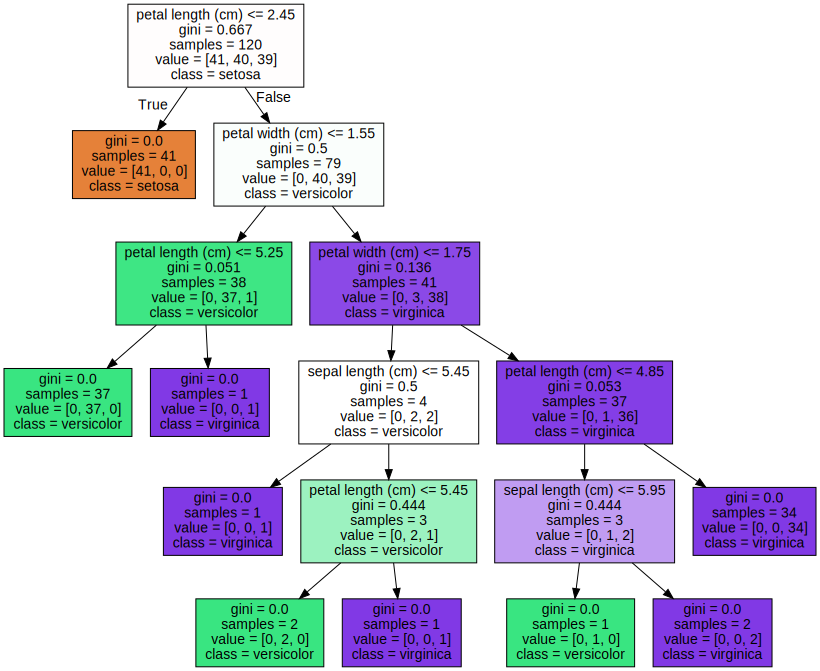

In [3]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

피처 중요도를 출력해보겠습니다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


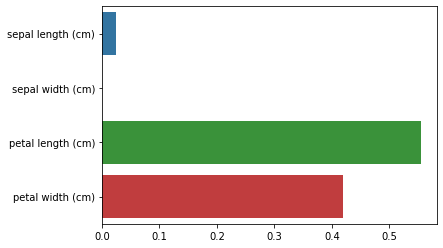

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{}: {:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

## **2.4. 결정 트리 과적합(overfitting)**

`make_classification()` 함수를 사용하여 피처 2개가 클래스 값을 3개만큼 가진 임의의 데이터 세트를 만들고 그래프로 시각화하겠습니다.

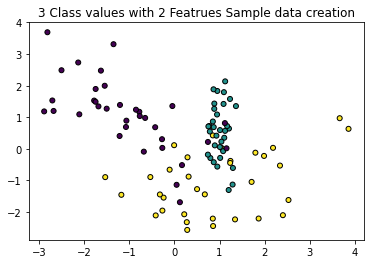

In [5]:
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Featrues Sample data creation')
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

본서의 부록에서 가져온 시각화 함수를 사용하여 결정 기준 경계를 시각화해보겠습니다. 먼저 분류기의 하이퍼 파라미터를 기본값으로 학습시키고 구현하겠습니다.

In [6]:
# Classifier의 Decision Boundary를 시각화 하는 함수입니다.
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터를 scatter plot으로 나타냅니다.
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 학습 데이터로 모델을 학습합니다.
    model.fit(X, y)
    # `meshgrid` 형태인 모든 좌표값으로 예측을 수행합니다. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # `contourf()` 메서드를 이용하여 class boundary를 시각화합니다.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

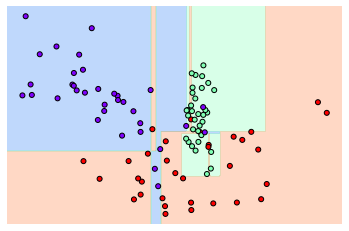

In [7]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치(Outlier)까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 많습니다. 하이퍼 파라미터를 기본값으로 학습한 모델은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 기준을 가지고 있습니다. 과대적합을 의미합니다. 

하이퍼 파라미터를 조금 조정하여 시각화해보겠습니다.

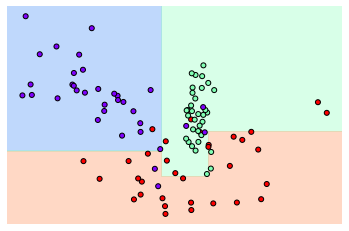

In [8]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 민감하지 않은 모델입니다. 이 모델이 과대적합된 위 모델보다 더 나은 예측 성능을 낼 것입니다. 

## **2.5. 결정 트리 실습 - 사용자 행동 인식 데이터 세트**

[UCI 머신러닝 리포지토리의 사용자 행동 인식 데이터 세트](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)에 대한 예측 분류를 수행하겠습니다. 이 데이터는 피실험자 30명에게 스마트폰 센서를 장착시키고 동작과 관련된 여러 피처를 수집한 것입니다.

먼저 피처 종류를 확인해보겠습니다.

In [9]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/gdrive/


In [21]:
feature_name_df = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체 움직임과 관련된 속성의 평균/표준편차가 X축, Y축, Z축 값으로 되어있습니다. 중복된 피처가 있는지 확인해보겠습니다.

In [22]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


피처 42개가 중복되어 있습니다. 이 중복된 피처에 _1이나 _2를 붙여서 새 피처를 갖도록 만드는 함수를 선언하겠습니다.

In [35]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

데이터셋의 데이터프레임을 생성하는 함수를 선언하겠습니다.

In [36]:
def get_human_dataset():
    feature_name_df = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
    # 중복된 피처를 수정하는 `get_new_feature_name_df()` 함수를 호출하여
    # 새 피처를 가진 데이터프레임을 생성합니다.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # 데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 변환합니다.
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
                          sep='\s+', names=feature_name)
    y_train = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
                          sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
                          sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

로드한 학습용 피처 데이터 세트를 확인해보겠습니다.

In [38]:
X_train, X_test, y_train, y_test = get_human_dataset()
print('학습 피처 데이터셋 info()')
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None




---

휴식 중

---



# **3. 앙상블 학습**

## **3.1. 앙상블 학습 개요**

## **3.2. 보팅 유형 - 하드 보팅(hard voting)과 소프트 보팅(soft voting)**

## **3.3. 보팅 분류기(voting classifier)**

# **4. 랜덤 포레스트**

## **4.1. 랜덤 포레스트 개요 및 실습**

## **4.2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

# **5. GBM(Gradient Boosting Machine)**

## **5.1. GBM의 개요 및 실습**

## **5.2. GBM 하이퍼 파라미터 및 튜닝**

# **6. XGBoost(eXtra Gradient Boost)**

## **6.1. XGBoost 개요**

## **6.2. XGBoost 설치하기**

## **6.3. 파이썬 래퍼 XGBoost 하이퍼 파라미터**

## **6.4. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

## **6.5. 사이킷런 래퍼 XGBoost의 개요 및 적용**

# **7. LightGBM**

## **7.1. LightGBM 설치**

## **7.2. LightGBM 하이퍼 파라미터**

## **7.3. 하이퍼 파라미터 튜닝 방안**

## **7.4. 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**

## **7.5. LightGBM 적용 - 위스콘신 유방암 예측**

# **8. 분류 실습 - 캐글 산탄데르 고객 만족 예측**

## **8.1. 데이터 전처리**

## **8.2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

## **8.3. LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

# **9. 분류 실습 - 캐글 신용카드 사기 검출**

## **9.1. 언더 샘플링과 오버 샘플링의 이해**

## **9.2. 데이터 일차 가공 및 모델 학습/예측/평가**

## **9.3. 데이터 분포도 변환 후 모델 학습/예측 평가**

## **9.4. 이상치 데이터 제거 후 모델 학습/예측/평가**

## **9.5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

# **10. 스태킹 앙상블**

## **10.1. 기본 스태킹 모델**

## **10.2. CV 세트 기반의 스태킹**

# **11. 정리**